<a href="https://colab.research.google.com/github/msmirikar22/MLPersonalLoanPrediction/blob/master/ML_PROJECT_IS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT TITLE**

# ***Marketing Campaign for Banking Products***

**Data Description:**
The file Bank_Personal_Loan_Modelling 1 (1).csv contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.

**Context:**
The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.

**1. Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.ensemble import RandomForestClassifier

**1.1 Importing Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling 1 (1).csv to Bank_Personal_Loan_Modelling 1 (1).csv


In [ ]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling 1 (1).csv']))


**1.2 Checking datatype, Statistical summary, Shape, Null Values**

**Understanding Data**


1. ID: Customer ID
2. Age: Customer's age in completed years
3. Experience: #years of professional experience
4. Income: Annual income of the customer
5. ZIP Code: Home Address ZIP code.
6. Family: Family size of the customer
7. CCAvg: Avg. spending on credit cards per month
8. Education: Education Level. 1: Undergrad; 2: Graduate; 3:Advanced/Professional
9. Mortgage: Value of house mortgage if any.
10. Personal Loan: Did this customer accept the personal loan offered in the last campaign?
11. Securities Account: Does the customer have a securities account with the bank?
12. CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
13. Online: Does the customer use internet banking facilities?
14. Credit card: Does the customer use a credit card issued by the bank?

In [ ]:
#to display top 5 rows
dataset.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
#to display bottom 5 rows
dataset.tail(5) 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
#to get shape(no of rows and columns) of dataset
dataset.shape 

(5000, 14)

In [ ]:
#to get summary and data type of data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
#to display the number of missing values in the data set
dataset.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**2. Cleaning irrelevant columns from data**

Here we are checking the corelation between the Experienxe and Age column. We observe that they are highly corelated. It also has faulty data(Negative values) as we observed above. So I decided to drop the experience column.

In [ ]:
exp = dataset['Experience']
age = dataset['Age']
corelation = exp.corr(age)
corelation

0.9942148569683321

Also the ID column is highly irrelevant for our analysis. It is dropped as well.

In [ ]:
df = pd.DataFrame(dataset)
dataset = df.drop(['ID','Experience'],axis=1)


In [ ]:
dataset.drop('ZIP Code',axis=1)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


**2.1 Displaying statistical values after cleaning data**

In [ ]:
dataset.head(5)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
dataset.shape

(5000, 12)

# **3 Exploratory Data Analysis**

**3.1 EDA Descriptive Statistics**

In [ ]:
dataset_desc = dataset[['Age','Income', 'CCAvg', 'Family']] 
#selecting columns for descriptive analysis 

Mean

In [ ]:
print("Data:\n",dataset_desc.mean()) 

Data:
 Age       45.338400
Income    73.774200
CCAvg      1.937938
Family     2.396400
dtype: float64


Mode


In [ ]:
print("Data:\n",dataset_desc.mode()) 

Data:
    Age  Income  CCAvg  Family
0   35      44    0.3       1


Median

In [ ]:
print("Data:\n",dataset_desc.median())

Data:
 Age       45.0
Income    64.0
CCAvg      1.5
Family     2.0
dtype: float64


Quantile 25%

In [ ]:
print("Data_quantile(25%): \n",dataset_desc.quantile(q=0.25))  # Prints the value below which 25% of the data lies

Data_quantile(25%): 
 Age       35.0
Income    39.0
CCAvg      0.7
Family     1.0
Name: 0.25, dtype: float64


Quantile 50%

In [ ]:
print("Data_quantile(50%):\n ",dataset_desc.quantile(q=0.50))  # Prints the value below which 50% of the data lies

Data_quantile(50%):
  Age       45.0
Income    64.0
CCAvg      1.5
Family     2.0
Name: 0.5, dtype: float64


Quantile 75%

In [ ]:
print("Data_quantile(75%): \n",dataset_desc.quantile(q=0.75))   # Prints the value below which 75% of the data lies

Data_quantile(75%): 
 Age       55.0
Income    98.0
CCAvg      2.5
Family     3.0
Name: 0.75, dtype: float64


Plotting the summery mean,mode,median of income using histogram

Mean:  73.7742 
Median:  64.0 
Mode:  44


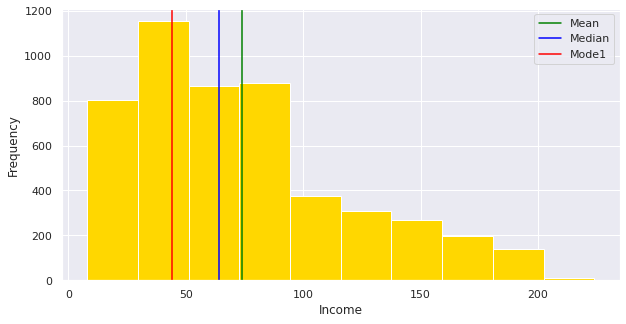

In [ ]:
mean=dataset_desc['Income'].mean()
median=dataset_desc['Income'].median()
mode=dataset_desc['Income'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(dataset_desc['Income'],bins=10,color='gold') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')    
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode1')

plt.xlabel('Income')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

**3.2 Checking the Measures of Dispersion**

IQR

In [ ]:
dataset_desc.quantile(0.75) - dataset_desc.quantile(0.25)

Age       20.0
Income    59.0
CCAvg      1.8
Family     2.0
dtype: float64

Range

In [ ]:
print(dataset_desc.max())
print(dataset_desc.min())
print("range")
dataset_desc.max() - dataset_desc.min()

Age        67.0
Income    224.0
CCAvg      10.0
Family      4.0
dtype: float64
Age       23.0
Income     8.0
CCAvg      0.0
Family     1.0
dtype: float64
range


Age        44.0
Income    216.0
CCAvg      10.0
Family      3.0
dtype: float64

Variance

In [ ]:
dataset_desc.var()

Age        131.404166
Income    2119.104235
CCAvg        3.054312
Family       1.317130
dtype: float64

Standard Deviation

In [ ]:
dataset_desc.std()

Age       11.463166
Income    46.033729
CCAvg      1.747659
Family     1.147663
dtype: float64

**3.3 Checking Covariance and Corelation**

In [ ]:
dataset.cov()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,131.404166,-29.164822,-7.106319e+02,-0.610664,-1.041997,0.397949,-14.619518,-0.026092,-0.001529,0.021965,0.077058,0.040118
Income,-29.164822,2119.104235,-1.602857e+03,-8.320957,51.970200,-7.250120,968.321693,6.814640,-0.036834,1.861611,0.320822,-0.050025
ZIP Code,-710.631942,-1602.857394,4.502257e+06,28.681947,-15.058132,-30.966736,1593.492802,0.067125,3.052497,10.096438,17.685947,7.436005
Family,-0.610664,-8.320957,2.868195e+01,1.317130,-0.219174,0.062584,-2.386602,0.020750,0.007017,0.003858,0.005830,0.006060
CCAvg,-1.041997,51.970200,-1.505813e+01,-0.219174,3.054312,-0.199803,19.536778,0.188910,0.008063,0.056850,-0.003096,-0.005327
Education,0.397949,-7.250120,-3.096674e+01,0.062584,-0.199803,0.705380,-2.847012,0.033831,-0.002777,0.002788,-0.006182,-0.004215
Mortgage,-14.619518,968.321693,1.593493e+03,-2.386602,19.536778,-2.847012,10345.697538,4.258167,-0.168308,2.164305,-0.299144,-0.335114
Personal Loan,-0.026092,6.814640,6.712543e-02,0.020750,0.188910,0.033831,4.258167,0.086801,0.001978,0.022206,0.000907,0.000376
Securities Account,-0.001529,-0.036834,3.052497e+00,0.007017,0.008063,-0.002777,-0.168308,0.001978,0.093519,0.023099,0.001894,-0.002094
CD Account,0.021965,1.861611,1.009644e+01,0.003858,0.056850,0.002788,2.164305,0.022206,0.023099,0.056763,0.020557,0.030248


In [ ]:
dataset.corr()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Income,-0.055269,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.169738,0.019972,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


**3.4 Checking description of data**

In [ ]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


**3.5 Checking Number of unique in each column**

In [ ]:
dataset.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

**3.6 Pairplot**

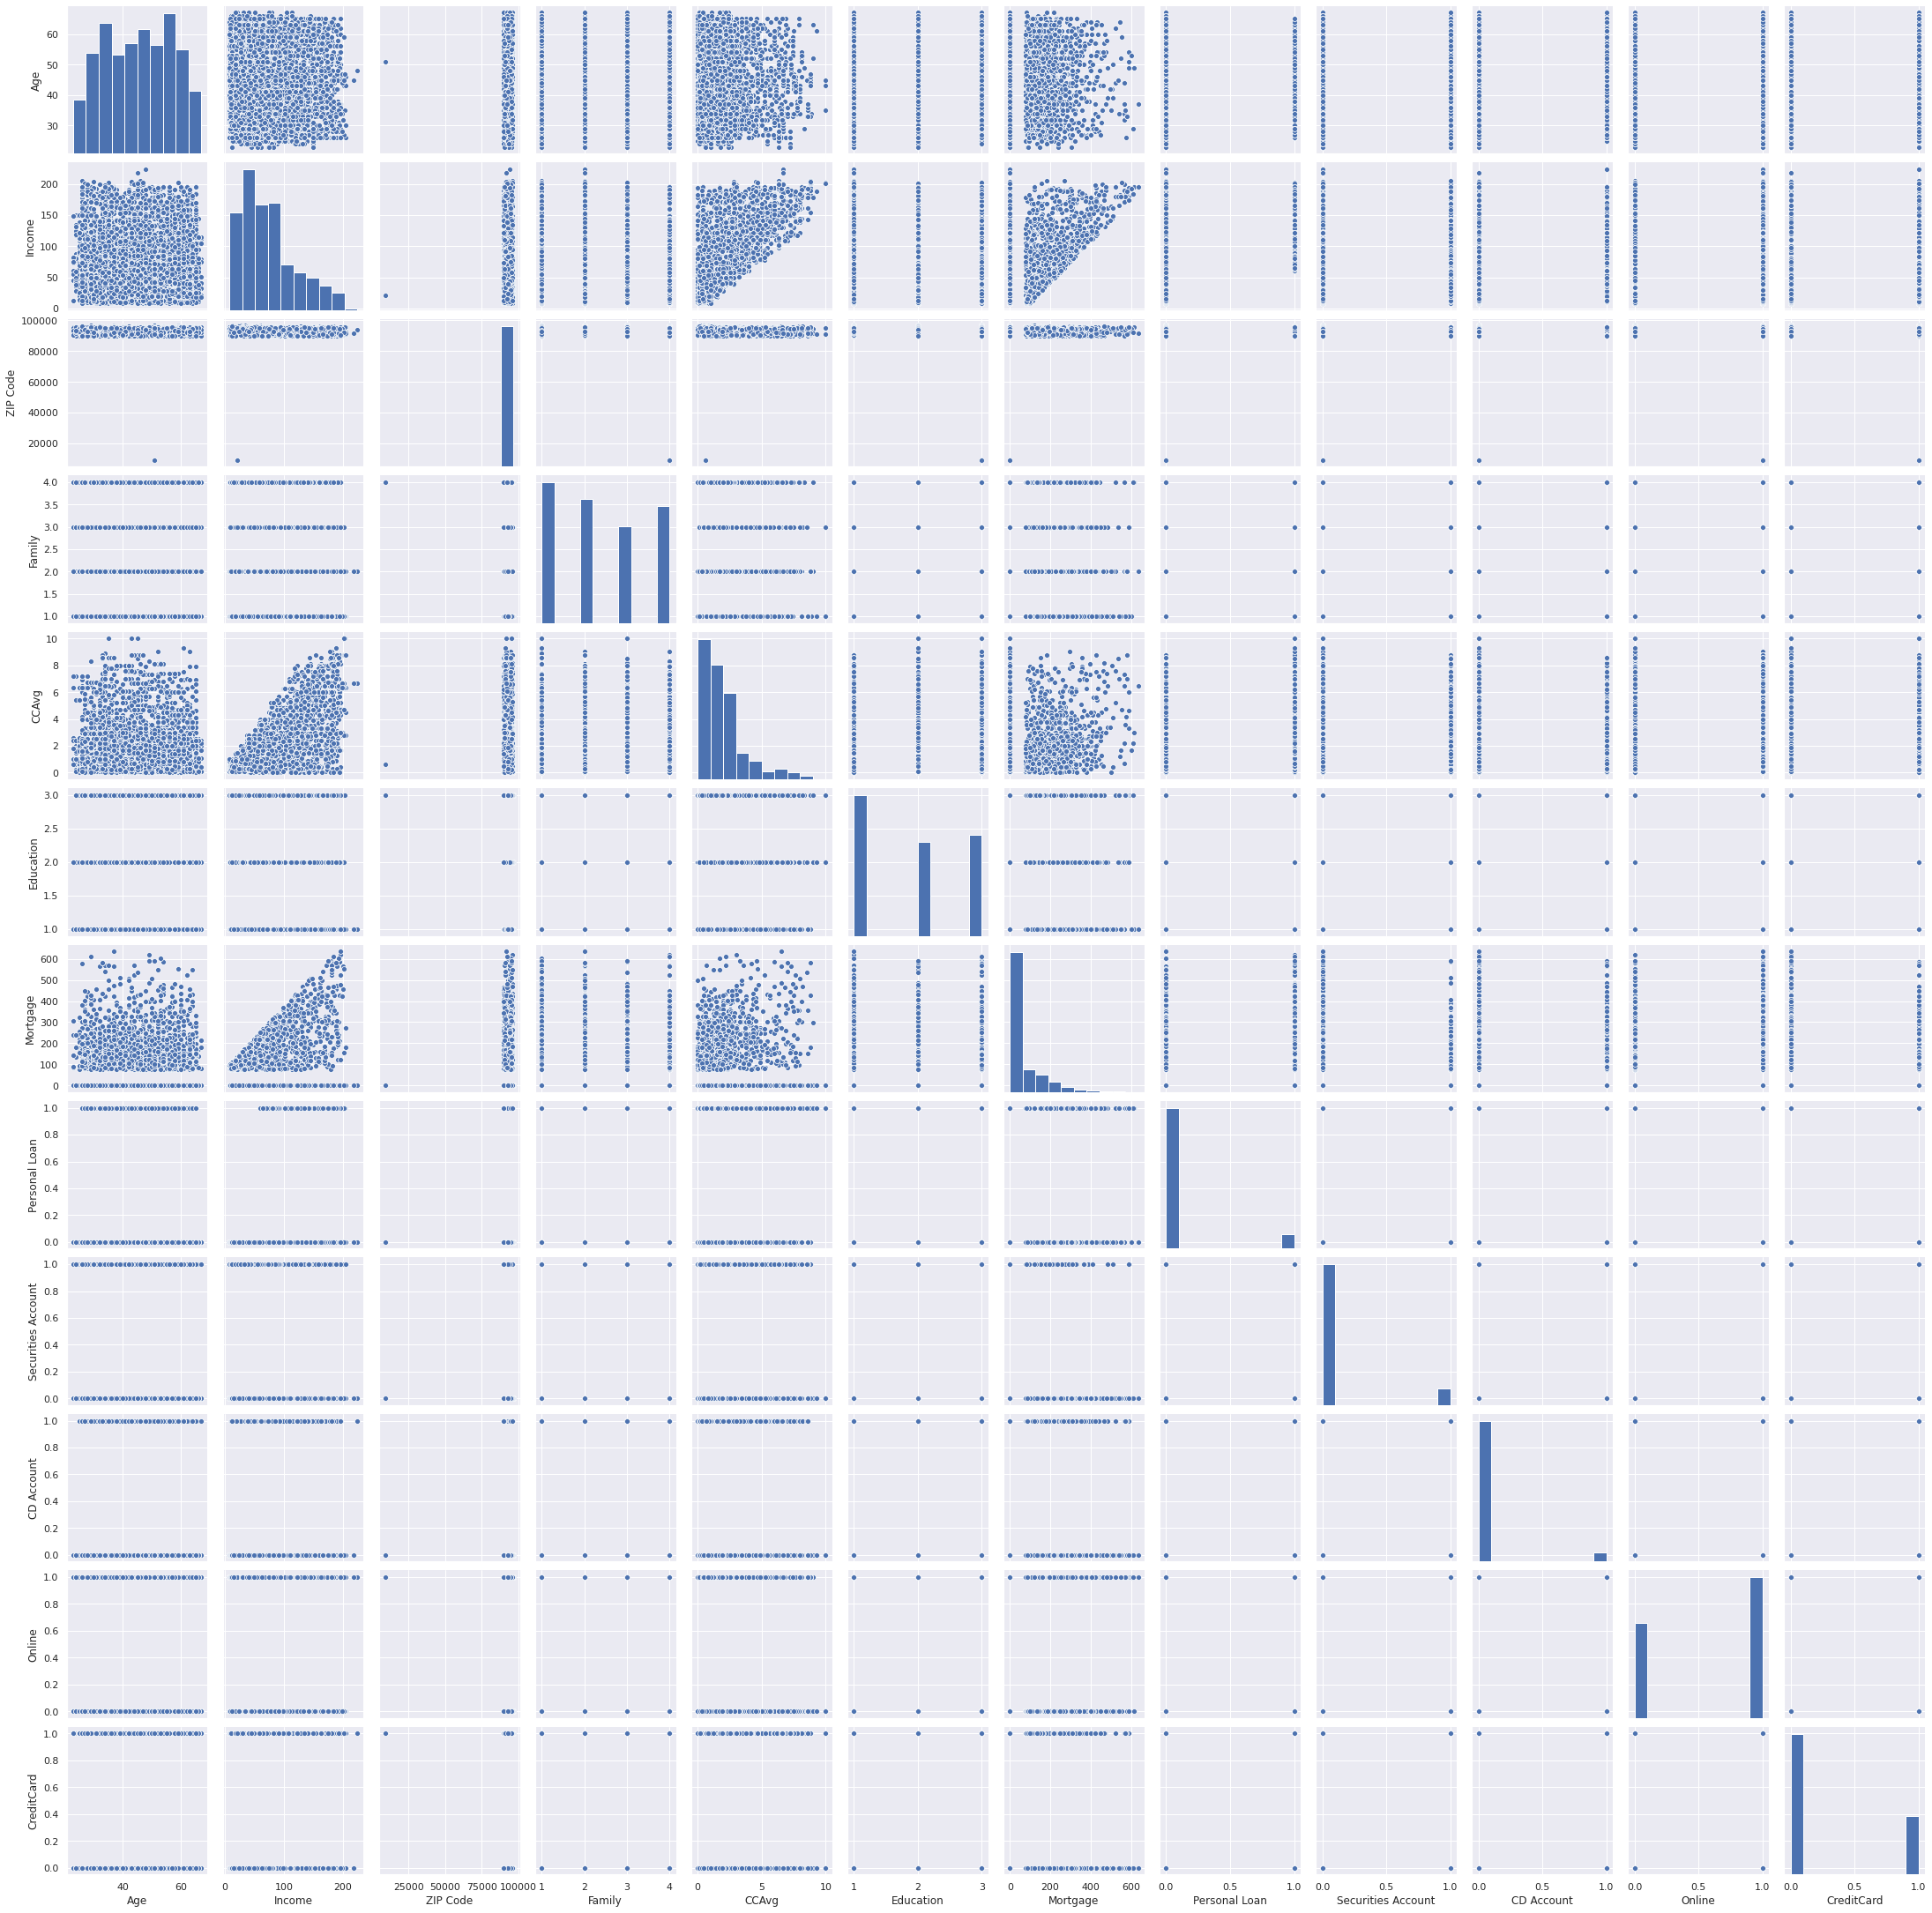

In [ ]:
sns.pairplot(dataset)



*   Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age.
*   Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median

*   CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K

*   Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K






**3.7 Heatmap**

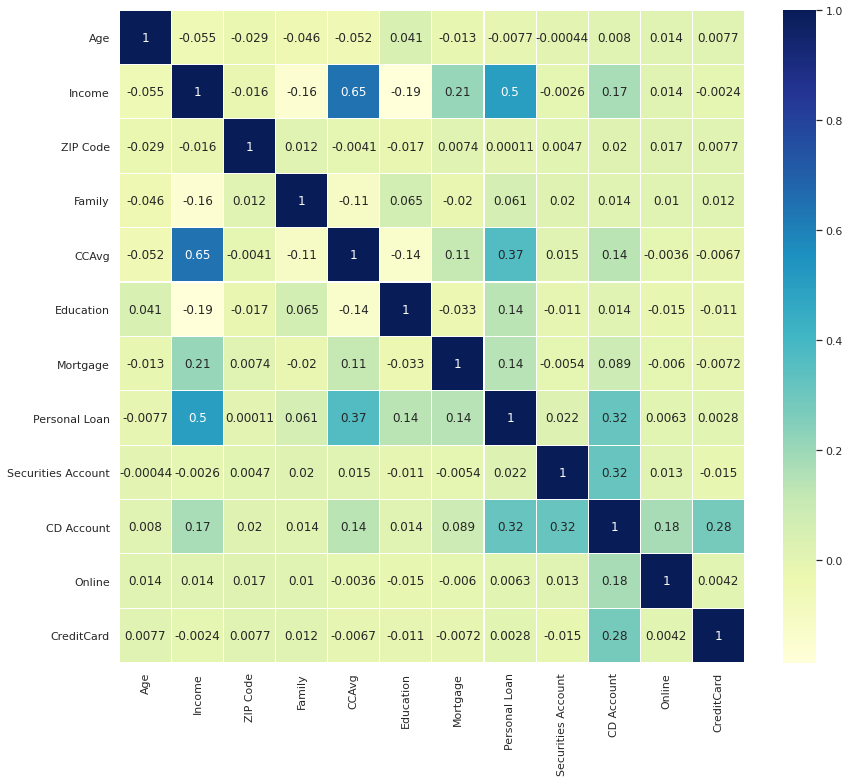

In [ ]:
plt.figure(figsize=(14,12))
sns.heatmap(dataset.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

***Observation:***

CCAvg and Income are correlated to each other.

---


Income and experience have very high correlation


---


Income and Personal Loan has correlation.

**3.8 Checking Number of people with zero mortgage**

In [ ]:
print('Number of people with zero mortgage:',len(dataset[dataset['Mortgage']==0]))

Number of people with zero mortgage: 3462


**3.9 Checking Number of people with zero credit card spending per month**



In [ ]:
## people with zero cc spending per month

print('Number of people with zero Credit Card spending per month:', len(dataset[dataset['CCAvg']==0]))

Number of people with zero Credit Card spending per month: 106


**3.10 Value counts of all categorical columns**

In [ ]:
categorical_columns = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Personal Loan']

for column in categorical_columns:
    print(f'Value counts for {column} column:')
    print(dataset[column].value_counts())
    print()

Value counts for Family column:
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

Value counts for Education column:
1    2096
3    1501
2    1403
Name: Education, dtype: int64

Value counts for Securities Account column:
0    4478
1     522
Name: Securities Account, dtype: int64

Value counts for CD Account column:
0    4698
1     302
Name: CD Account, dtype: int64

Value counts for Online column:
1    2984
0    2016
Name: Online, dtype: int64

Value counts for CreditCard column:
0    3530
1    1470
Name: CreditCard, dtype: int64

Value counts for Personal Loan column:
0    4520
1     480
Name: Personal Loan, dtype: int64



**3.11 Univariate Analysis**


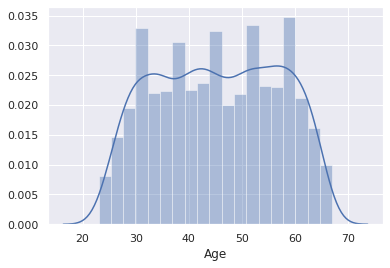

In [ ]:
sns.distplot(dataset.Age)
##Age has a symmetric distribution.

*It can be observed the age lies mostly between 30-60*

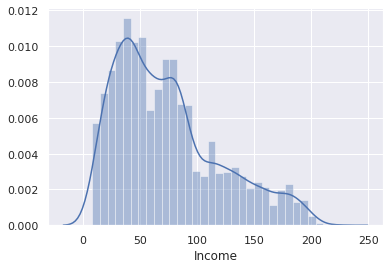

In [ ]:
sns.distplot(dataset['Income'])
##Income has a right skewed distribution

Text(0.7, 59, 'IQR')

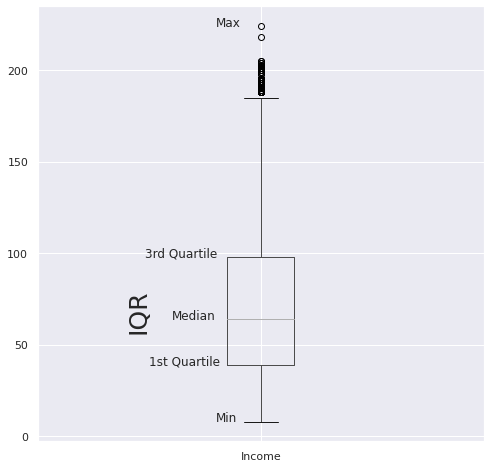

In [ ]:
# Create boxplot for column="Income"
dataset.boxplot(column="Income",return_type='axes',figsize=(8,8))

plt.text(x=0.74, y=98.00, s="3rd Quartile")
plt.text(x=0.8, y=64.00, s="Median")
plt.text(x=0.75, y=39.00, s="1st Quartile")
plt.text(x=0.9, y=8.00, s="Min")
plt.text(x=0.9, y=224.00, s="Max")
plt.text(x=0.7, y=98-39, s="IQR", rotation=90, size=25)

*It can be observed that income has too many outliers.*

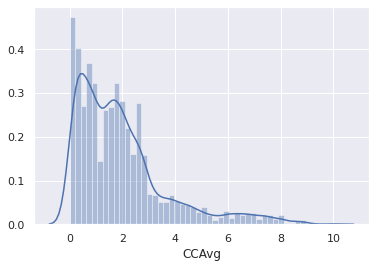

In [ ]:
sns.distplot(dataset.CCAvg)


*It can be observed that CCAvg is positively skewed*

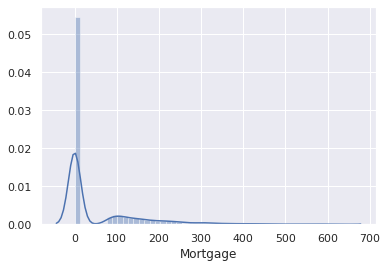

In [ ]:
sns.distplot(dataset.Mortgage)


*It can be observed that mortgage contains ,ost of the values as zero.*

**3.12 Bivariate Analysis**

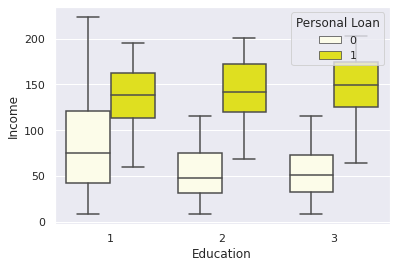

In [ ]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=dataset, color='yellow')


*Observation - Education does not have any impact on loan decision making.*

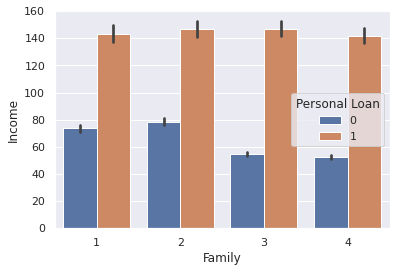

In [ ]:
sns.barplot(dataset['Family'], dataset['Income'], hue= dataset['Personal Loan'])

*Observation - Family Size does not have any impact on loan decision making.*

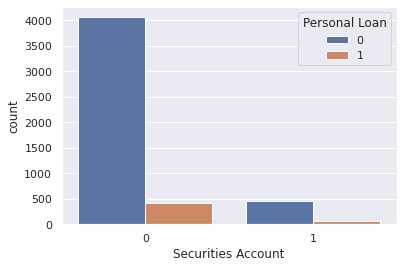

In [ ]:
sns.countplot(x="Securities Account", data=dataset,hue="Personal Loan")


*Observation - Exisitng Securities Account in a bank does not have any impact on loan decision making.*

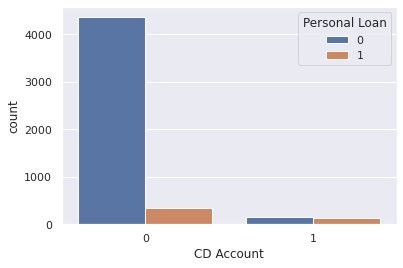

In [ ]:
sns.countplot(x="CD Account", data=dataset,hue="Personal Loan")

*Observation - Exisitng CDAccount in a bank does not have any impact on loan decision making.*

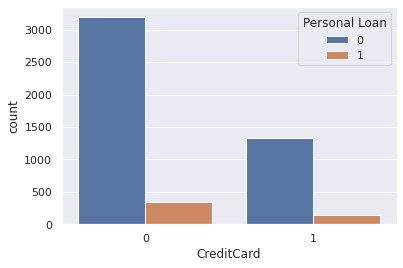

In [ ]:
sns.countplot(x="CreditCard", data=dataset,hue="Personal Loan")

*Observation - Exisitng Credit card in a bank does not have any impact on loan decision making.*



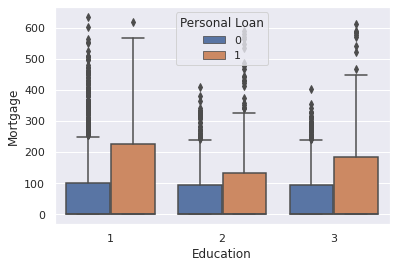

In [ ]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=dataset)

In [ ]:
df_with_Personal_Loan = dataset.loc[dataset['Personal Loan'] == 1]
df_without_Personal_Loan = dataset.loc[dataset['Personal Loan'] == 0]

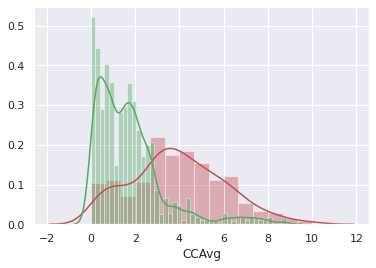

In [ ]:
sns.distplot( df_with_Personal_Loan['CCAvg'], color = 'r')
sns.distplot( df_without_Personal_Loan['CCAvg'], color = 'g')

*Observation - Higher CCAvg increases tendency to take personal loans.*

In [ ]:
print('Credit card spending of Non-Loan customers: ',df_with_Personal_Loan['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', df_without_Personal_Loan['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  3800.0
Credit card spending of Loan customers    :  1400.0


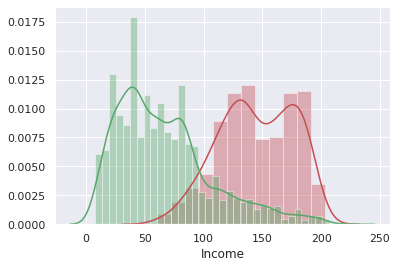

In [ ]:
sns.distplot( df_with_Personal_Loan['Income'], color = 'r')
sns.distplot( df_without_Personal_Loan['Income'], color = 'g')

*Observation - Higher income increases tendency to take personal loans.*

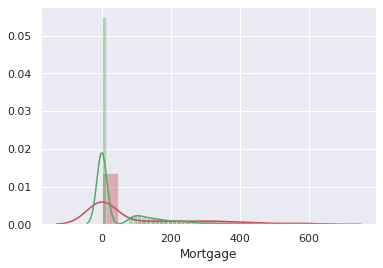

In [ ]:
sns.distplot( df_with_Personal_Loan['Mortgage'], color = 'r')
sns.distplot( df_without_Personal_Loan['Mortgage'], color = 'g')

*Observation - Mortgage does not have any impact on personal loans.*

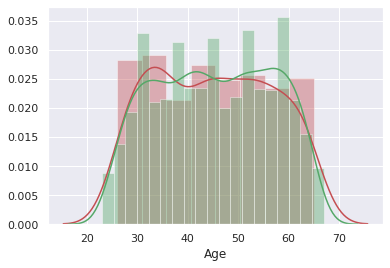

In [ ]:
sns.distplot( df_with_Personal_Loan['Age'], color = 'r')
sns.distplot( df_without_Personal_Loan['Age'], color = 'g')

*Observation - Age does not have any impact on personal loans.*

# 4. Applying necessary transformations for the feature variables

In [ ]:
data_x=dataset.loc[:, dataset.columns != 'Personal Loan']
data_y=dataset[['Personal Loan']]


In [ ]:
#transformation
#function to plot a histogram and Q-Q plot side by side , for a certain variable

def transform_plot(dataset, variable):
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  dataset[variable].hist()
  plt.subplot(1,2,2)

  stats.probplot(dataset[variable], dist="norm", plot=plt)
  plt.show()

Parameters/optimal lambda:  0.26245789911013795


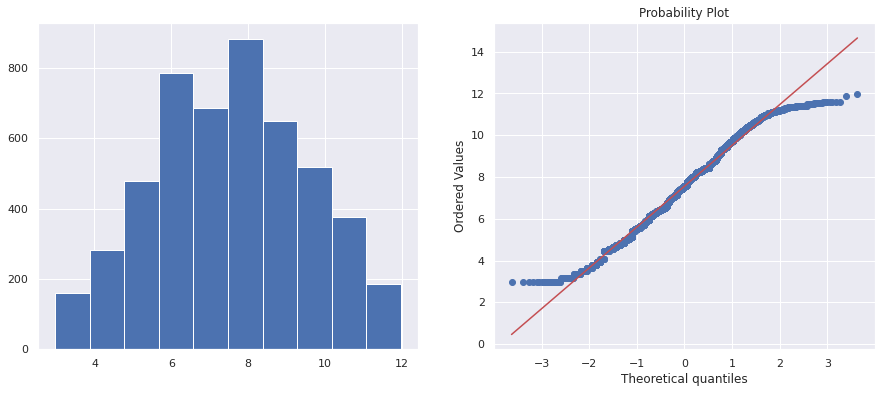

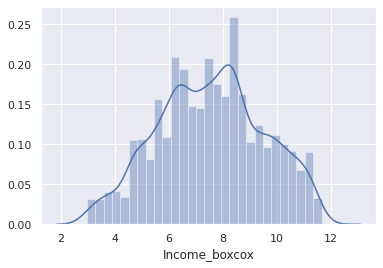

In [ ]:
dataset['Income_boxcox'], param = stats.boxcox(data_x.Income+1)

print('Parameters/optimal lambda: ', param)

transform_plot(dataset,'Income_boxcox')
sns.distplot(dataset['Income_boxcox'])

Parameters/optimal lambda:  -0.2623465859490784


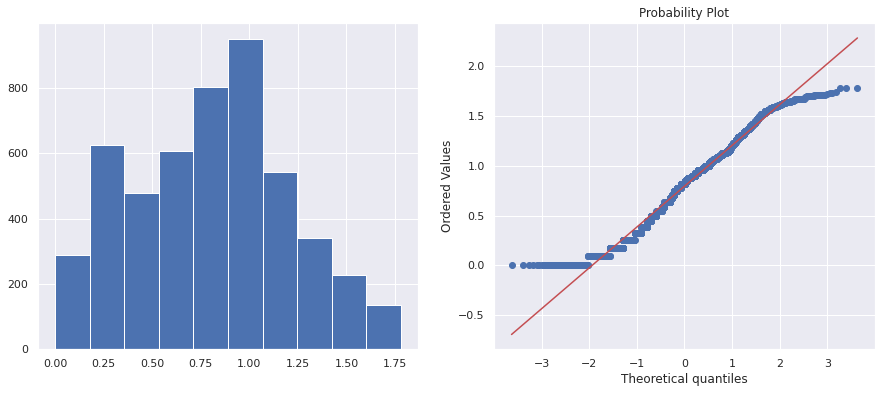

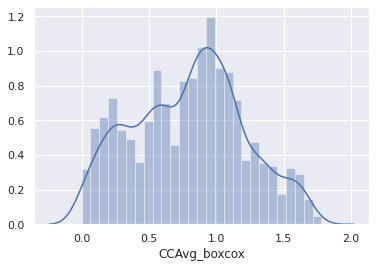

In [ ]:
dataset['CCAvg_boxcox'], param = stats.boxcox(data_x.CCAvg+1)

print('Parameters/optimal lambda: ', param)

transform_plot(dataset,'CCAvg_boxcox')
sns.distplot(dataset['CCAvg_boxcox'])

Parameters/optimal lambda:  -0.4990617561774249


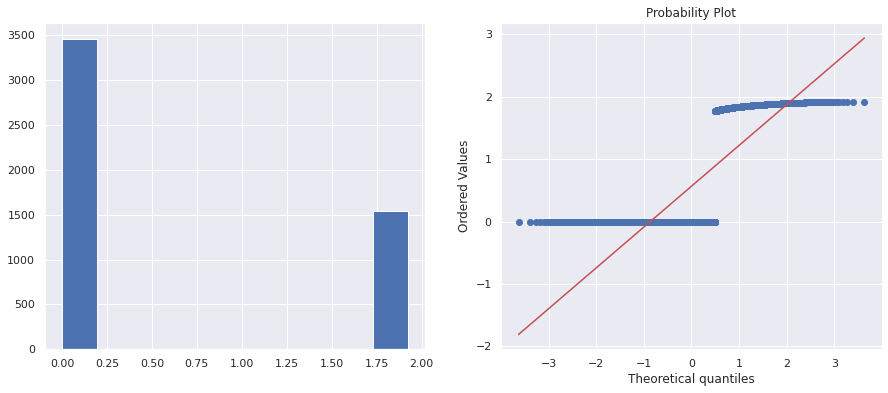

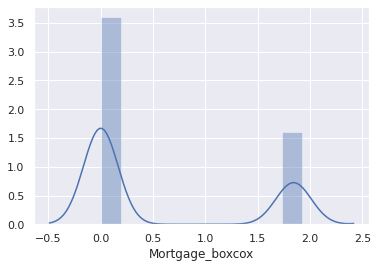

In [ ]:
dataset['Mortgage_boxcox'], param = stats.boxcox(data_x.Mortgage+1)

print('Parameters/optimal lambda: ', param)

transform_plot(dataset,'Mortgage_boxcox')
sns.distplot(dataset['Mortgage_boxcox'])

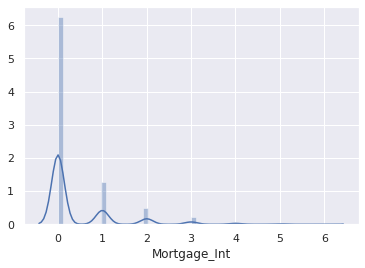

In [ ]:
dataset['Mortgage_Int']=pd.cut(dataset['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
dataset.drop(['Mortgage'],axis=1,inplace=True)
sns.distplot(dataset['Mortgage_Int'])

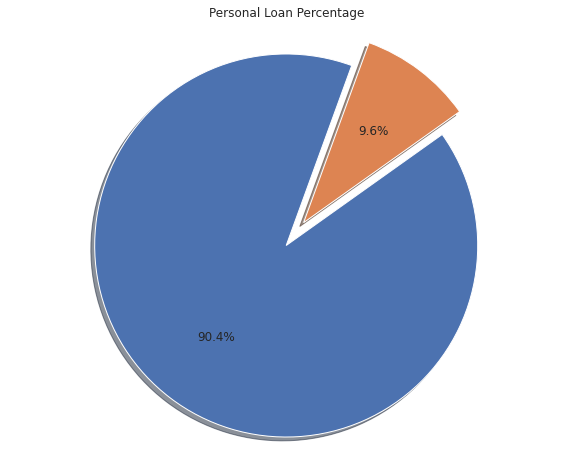

In [ ]:
DF=pd.DataFrame(dataset['Personal Loan'].value_counts()).reset_index()
DF.columns=['Labels','Personal Loan']
fig1,ax1=plt.subplots(figsize=(10,8))
explode=(0,0.15)
ax1.pie(DF['Personal Loan'],explode=explode,autopct='%1.1f%%',shadow=True,startangle=70)
ax1.axis('equal')
plt.title('Personal Loan Percentage')
plt.show()

##9.6% get approved for personal loans.

# 5. Scaling Data and Splitting Data into train and test

In [ ]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['Age', 'Income', 'Family', 'CCAvg', 'Education']

for column in columns_to_scale:
    scaler = MinMaxScaler()
    dataset[column] = scaler.fit_transform(dataset[column].values.reshape(-1, 1))
    
dataset.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Income_boxcox,CCAvg_boxcox,Mortgage_boxcox,Mortgage_Int
0,0.045455,0.189815,91107,1.000000,0.16,0.0,0,1,0,0,0,6.827583,0.845160,0.0,0
1,0.500000,0.120370,90089,0.666667,0.15,0.0,0,1,0,0,0,5.876952,0.814478,0.0,0
2,0.363636,0.013889,94720,0.000000,0.10,0.0,0,0,0,0,0,3.504287,0.633777,0.0,0
3,0.272727,0.425926,94112,0.000000,0.27,0.5,0,0,0,0,0,8.983393,1.107427,0.0,0
4,0.272727,0.171296,91330,1.000000,0.10,0.5,0,0,0,0,1,6.597314,0.633777,0.0,0


In [ ]:
dataset= dataset.drop(['ZIP Code'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X = dataset.drop(['Personal Loan'], axis=1)
Y = dataset[['Personal Loan']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, stratify= Y,random_state=21)

In [ ]:
class_names = ['wont take loan', 'take loan']

# 6. Using Logistic Regression model to predict the likelihood of a customer buying
# personal loans.

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(C=1.0, max_iter=5000)
logisticRegr.fit(X_train, np.ravel(y_train,order='C'))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print('Logistic Regression Results: ')

train_score = logisticRegr.score(X_train, y_train)
print('Training Accuracy:', train_score.round(2))
test_score = logisticRegr.score(X_test, y_test)
print('Testing Accuracy:', test_score.round(2))

y_pred_logi = logisticRegr.predict(X_test)

precision_logi = precision_score(y_test, y_pred_logi, labels=class_names).round(2)
print('Precision:', precision_logi)
recall_logi = recall_score(y_test, y_pred_logi).round(2)
print('Recall:', recall_logi)

Logistic Regression Results: 
Training Accuracy: 0.96
Testing Accuracy: 0.95
Precision: 0.84
Recall: 0.59


6.1 Printing metrics related to evaluating performance of model

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

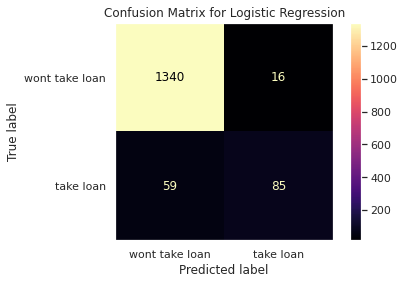

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
plot_confusion_matrix(logisticRegr, X_test, y_test, display_labels=class_names, values_format="d", cmap=plt.cm.magma)
plt.grid(b=None)
plt.title('Confusion Matrix for Logistic Regression')

Text(0.5, 1.0, 'ROC Curve for Logistic Regression')

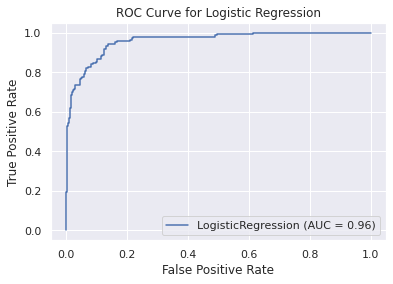

In [ ]:
plot_roc_curve(logisticRegr, X_test, y_test)
plt.title('ROC Curve for Logistic Regression')

Text(0.5, 1.0, 'Precision-Recall Curve for Logistic Regression')

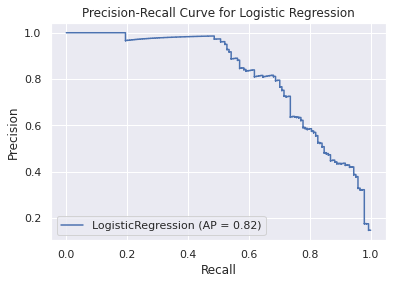

In [ ]:
plot_precision_recall_curve(logisticRegr, X_test, y_test)
plt.title('Precision-Recall Curve for Logistic Regression')

# 7. Using KNN Classifier to predict the likelihood of a customer buying
# personal loans

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, np.ravel(y_train,order='C'))

# predict the response
y_pred = knn.predict(X_test)


In [ ]:
print('KNN')

train_scorek = knn.score(X_train, y_train)
print('Training Accuracy:', train_scorek.round(2))
test_scorek = knn.score(X_test, y_test)
print('Testing Accuracy:', test_scorek.round(2))

y_pred_knn = knn.predict(X_test)

precision_knn = precision_score(y_test, y_pred_knn, labels=class_names).round(2)
print('Precision:', precision_knn)
recall_knn = recall_score(y_test, y_pred_knn).round(2)
print('Recall:', recall_knn)

KNN
Training Accuracy: 0.97
Testing Accuracy: 0.96
Precision: 0.93
Recall: 0.62


7.1 Printing metrics related to evaluating performance of model

Text(0.5, 1.0, 'Confusion Matrix for KNN')

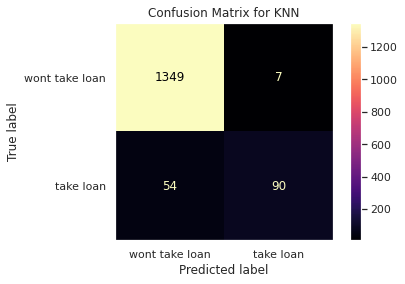

In [ ]:
plot_confusion_matrix(knn, X_test, y_test, display_labels=class_names, values_format="d", cmap=plt.cm.magma, ax=None)
plt.grid(b=None)
plt.title('Confusion Matrix for KNN')

Text(0.5, 1.0, 'ROC Curve for KNN')

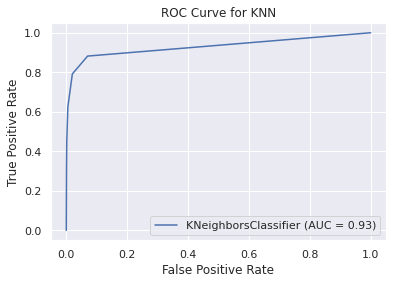

In [ ]:
plot_roc_curve(knn, X_test, y_test)
plt.title('ROC Curve for KNN')

Text(0.5, 1.0, 'Precision-Recall Curve for KNN')

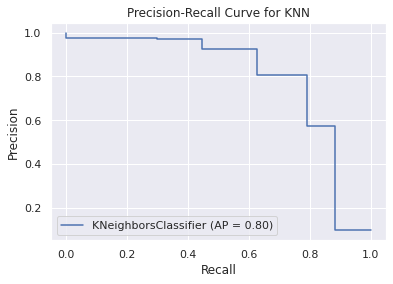

In [ ]:
plot_precision_recall_curve(knn, X_test, y_test)
plt.title('Precision-Recall Curve for KNN')

# 8. Using Naive Baiyes Classifier to predict the likelihood of a customer buying
# personal loans 

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nbaiyes = MultinomialNB().fit(X_train, np.ravel(y_train,order='C'))

In [ ]:
print('NB')

train_scoren = nbaiyes.score(X_train, y_train)
print('Training Accuracy:', train_scoren.round(2))
test_scoren = nbaiyes.score(X_test, y_test)
print('Testing Accuracy:', test_scoren.round(2))

y_pred_nb = nbaiyes.predict(X_test)

precision_nb = precision_score(y_test, y_pred_nb, labels=class_names).round(2)
print('Precision:', precision_nb)
recall_nb = recall_score(y_test, y_pred_nb).round(2)
print('Recall:', recall_nb)

NB
Training Accuracy: 0.91
Testing Accuracy: 0.91
Precision: 1.0
Recall: 0.06


8.1 Printing metrics related to evaluating performance of model

Text(0.5, 1.0, 'Confusion Matrix for Nb')

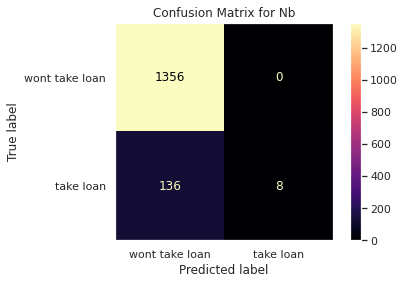

In [ ]:
plot_confusion_matrix(nbaiyes, X_test, y_test, display_labels=class_names, values_format="d", cmap=plt.cm.magma, ax=None)
plt.grid(b=None)
plt.title('Confusion Matrix for Nb')

Text(0.5, 1.0, 'ROC Curve for NB')

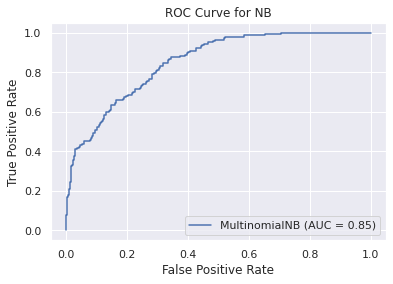

In [ ]:
plot_roc_curve(nbaiyes, X_test, y_test)
plt.title('ROC Curve for NB')

Text(0.5, 1.0, 'Precision-Recall Curve for NB')

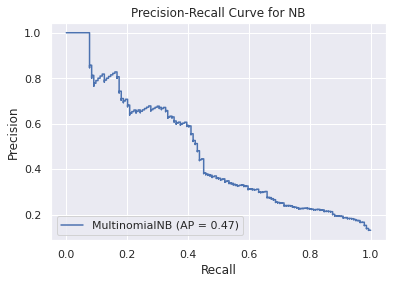

In [ ]:
plot_precision_recall_curve(nbaiyes, X_test, y_test)
plt.title('Precision-Recall Curve for NB')

# 9. Using Random Forest Classifier to predict the likelihood of a customer buying
# personal loans

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=300, max_depth=7,n_jobs=-1 )
rf_clf.fit(X_train, np.ravel(y_train))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

Random Forest Classifier Results: 
Training Accuracy: 0.99
Testing Accuracy: 0.98
Precision: 0.98
Recall: 0.82


Text(0.5, 1.0, 'Precision-Recall Random Forest Classifier')

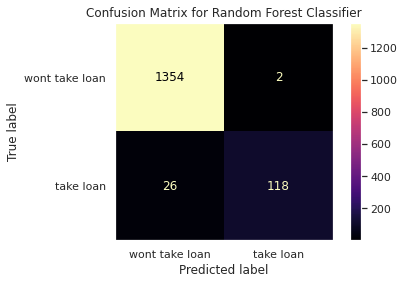

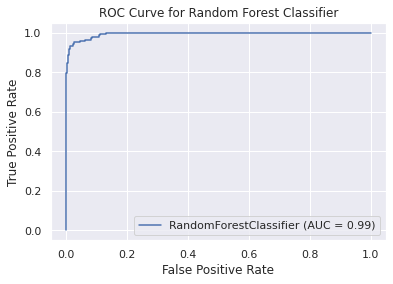

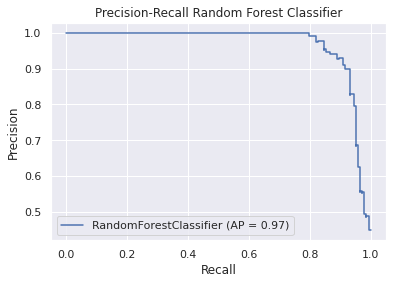

In [ ]:
print('Random Forest Classifier Results: ')

train_scorer = rf_clf.score(X_train, y_train)
print('Training Accuracy:', train_scorer.round(2))
test_scorer = rf_clf.score(X_test,y_test)
print('Testing Accuracy:', test_scorer.round(2))

y_pred_rf = rf_clf.predict(X_test)

precision_rf = precision_score(y_test, y_pred_rf, labels=class_names).round(2)
print('Precision:', precision_rf)
recall_rf = recall_score(y_test, y_pred_rf).round(2)
print('Recall:', recall_rf)

plot_confusion_matrix(rf_clf,X_test,y_test, display_labels=class_names, values_format="d", cmap=plt.cm.magma, ax=None)
plt.grid(b=None)
plt.title('Confusion Matrix for Random Forest Classifier')

plot_roc_curve(rf_clf,X_test,y_test)
plt.title('ROC Curve for Random Forest Classifier')

plot_precision_recall_curve(rf_clf,X_test,y_test)
plt.title('Precision-Recall Random Forest Classifier')

## 10. Conclusion


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LOGR: 0.955200 (0.005879)
KNN: 0.961200 (0.005455)
NB: 0.908600 (0.012587)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.986200 (0.005325)


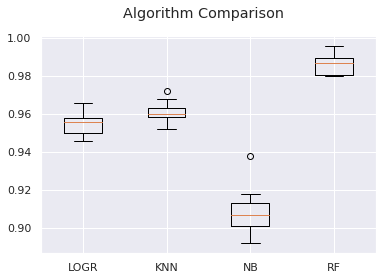

In [ ]:
from sklearn import model_selection
models = []
LogisticRegression
models.append(('LOGR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', MultinomialNB()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, np.ravel(Y), cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

So, according to my observations of the above graph, it seems that among all the algorithms, Random Forest Classifier has the highest accuracy. And it should be used as our final model.

**11. Business Understanding Of the model** 

As you probably know, predictive models are either Regressive models(continuous output) or Classification models(categorical output). In this case, the output is clearly categorical. The customer can either take a personal load or not, hence, this model is a classification model. 

Also, before building any machine learning model, it is very necessary to note the misclassification cost of each class. It is also very important to choose a proper metrics(For classification model: accuracy, recall, precision) for evaluation of the model’s performance. 

These give powerful insights which will help in improving the response rate from the customers and thereby conversion to availing loans with the bank.